### Python para "criar" Bases de Dados no PowerBI

Integrar todos os arquivos em 1 único apenas com as informações relevantes. Depois, importar essa base tratada para o Power BI

In [7]:
import pandas as pd
import os

# Definindo o caminho padrão:
caminho_padrao = r'C:\Users\diego\OneDrive\Área de Trabalho\Programação\Hashtag Programação\Python Impressionador\Mod 26 - Python e Dashboards - Python e Power BI'

# Leitura dos arquivos CSV
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Banco de Dados\Contoso - Vendas - 2017.csv'), sep=';', encoding='utf-8')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Banco de Dados\Contoso - Cadastro Produtos.csv'), sep=';', encoding='utf-8')[['Nome do Produto', 'ID Produto']]
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Banco de Dados\Contoso - Lojas.csv'), sep=';', encoding='utf-8')[['ID Loja', 'Nome da Loja']]
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Banco de Dados\Contoso - Clientes.csv'), sep=';', encoding='utf-8')[['ID Cliente', 'E-mail']]

# Merge dos DataFrames
vendas_df = vendas_df.merge(produtos_df, on='ID Produto').merge(lojas_df, on='ID Loja').merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail Cliente'})

# Exibição do DataFrame resultante - Para o PowerBi não é necessário usar o display
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


In [8]:
dataset = vendas_df
tres_lojas_df = dataset[dataset['ID Loja'].isin([86, 306, 172])]
display(tres_lojas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,21/05/2017,22/05/2017,1,86,981,1,21344,10,0,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,08/06/2017,11/06/2017,3,172,1287,1,559,5,0,Contoso Genuine Leather Grip Belt E322 White,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,17/09/2017,23/09/2017,6,172,1236,3,13331,6,0,"Fabrikam Social Videographer 1"" 25mm E400 Blue",Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,18/10/2017,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam Social Videographer 1'' 25mm E400 White,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,30/10/2017,02/11/2017,3,172,937,1,341,10,0,SV 4GB Laptop Memory M65 White,Loja Contoso Hartford,mpadfield9g@usnews.com


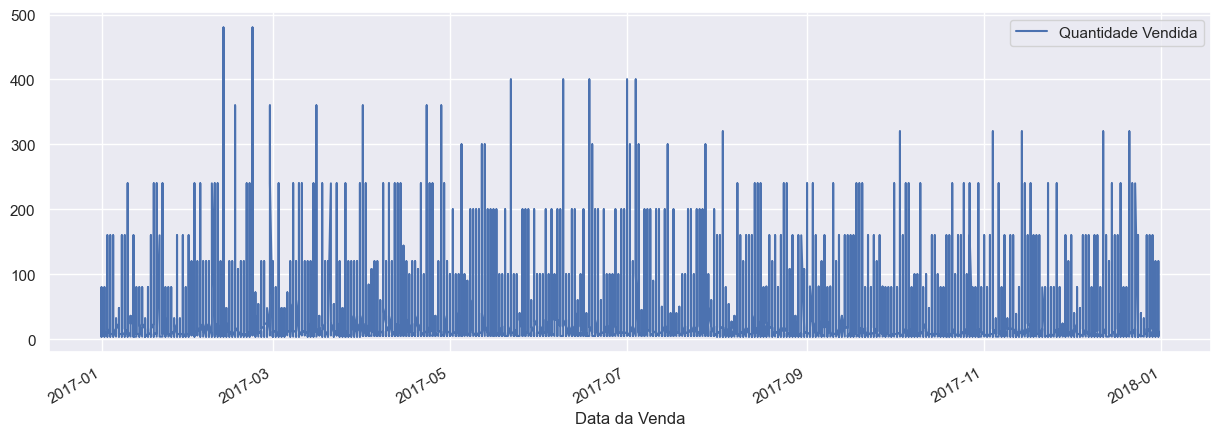

In [9]:
tres_lojas_df = tres_lojas_df.copy()
tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')

#No PowerBI só é necessária essa parte substituindo tres_lojas_df por dataset:
import matplotlib.pyplot as plt

tres_lojas_df.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15, 5))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,5))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(DateFormatter('%m'))
ax.set_xlim(1, None)
sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=tres_lojas_df, ax=ax)

plt.show()

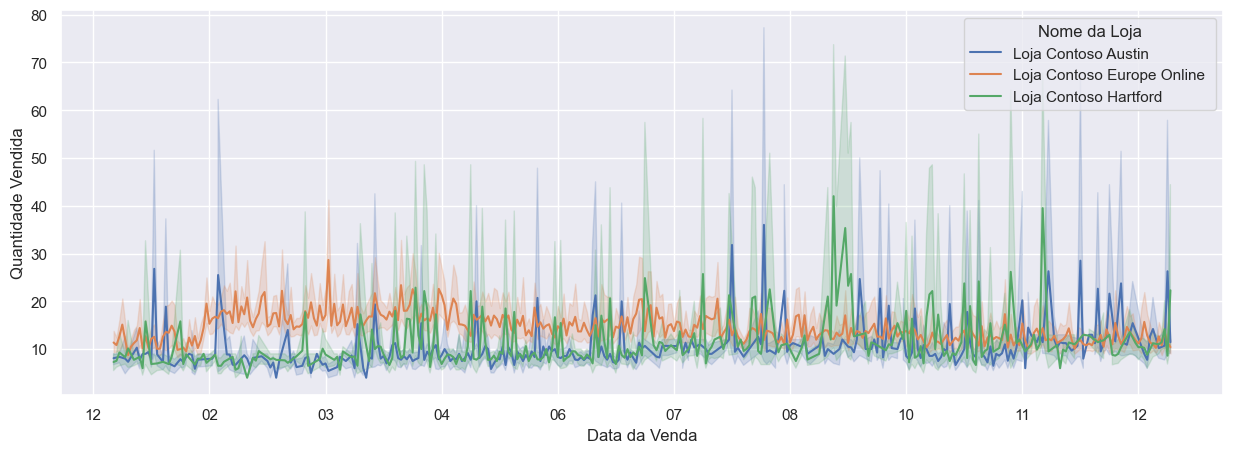

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(15,5))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(DateFormatter('%m'))
sns.lineplot(x='Data da Venda', y='Quantidade Vendida', hue='Nome da Loja', data=tres_lojas_df, ax=ax)

plt.show()